## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("processed_housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [6]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,2


<pre>
<b>Some Information About The Proccessed data:</b>
    Columns = {price, area, bedrooms, bathrooms, mainroad, guestroom, basement, airconditioning, parking, furnishingstatus}
    
    Price: Int
    Area: Int
    Bedrooms: Int
    Bathrooms: Int
    Mainroad: {1: yes, 0: No} Object
    Guestroom: {1: yes, 0: No} Object
    Basement: {1: yes, 0: No} Object
    Airconditioning: {1: yes, 0: No} Object
    parking: Int
    furnishingstatus: {furnished: 0, semi-furnished: 1, unfurnished: 2} Object
</pre>

## Train Test Split

In [7]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [8]:
X_train = df_train.drop(columns="price").to_numpy()
Y_train = df_train["price"].to_numpy()

X_test = df_test.drop(columns="price").to_numpy()
Y_test = df_test["price"].to_numpy()

In [9]:
X_train

array([[6360,    3,    1, ...,    0,    1,    1],
       [2870,    2,    1, ...,    0,    1,    1],
       [2520,    5,    2, ...,    1,    0,    0],
       ...,
       [5020,    3,    1, ...,    0,    1,    2],
       [2850,    3,    2, ...,    0,    1,    2],
       [6000,    4,    1, ...,    0,    1,    2]], dtype=int64)

## Modeling

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
test_pred = model.predict(X_test)

In [13]:
r2_score(Y_test, test_pred)

0.6608917863501481

In [14]:
Y_test

array([4550000, 4200000, 5320000, 5250000, 4270000, 7525000, 3500000,
       4403000, 4830000, 5950000, 3150000, 3360000, 3500000, 3115000,
       2940000, 4956000, 7560000, 3143000, 2233000, 2940000, 5810000,
       3500000, 4480000, 2940000, 2240000, 2450000, 5950000, 3465000,
       3640000, 5740000, 5866000, 3640000, 5390000, 6293000, 3430000,
       3500000, 8890000, 6685000, 3430000, 2870000, 6090000, 7350000,
       8680000, 5075000, 3332000, 3500000, 3010000, 4410000, 3115000,
       1890000, 5215000, 2408000, 4515000, 4200000, 2450000, 6790000,
       2835000, 5229000, 2590000, 4760000, 4200000, 2520000, 7350000,
       5250000, 3129000, 4900000, 5950000, 4200000, 3633000, 5495000,
       4403000, 4235000, 5460000, 6440000, 3325000, 4445000, 4620000,
       4095000, 7980000, 7245000, 5950000, 7210000, 4690000, 3010000,
       5600000, 2380000, 3815000, 7962500, 3500000, 4760000, 8080940,
       3290000, 4830000, 4060000, 2940000, 2800000, 4305000, 4550000,
       9100000, 6615

In [15]:
test_pred[:10]

array([5134600.77398024, 4562468.70840021, 6066040.31814118,
       5761119.77301704, 3704200.34737478, 6994163.81609844,
       3500568.20315337, 4160370.45115395, 6418769.32486736,
       6483486.65353729])

## Visualization

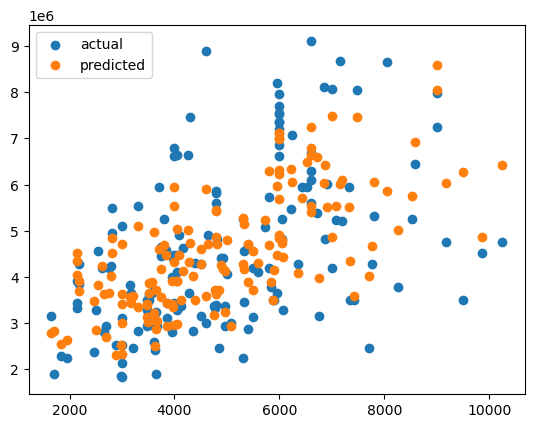

In [16]:
plt.scatter(X_test[:, 0], Y_test, label="actual")
plt.scatter(X_test[:, 0], test_pred, label="predicted")
plt.legend()